In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
#data loading
df=pd.read_csv("creditcard.csv")

Data Exploration

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:>

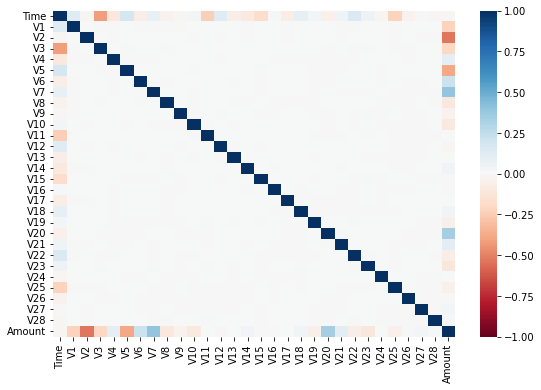

In [6]:
df_corr = df.drop(['Class'], axis=1)
corr = df_corr.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1)

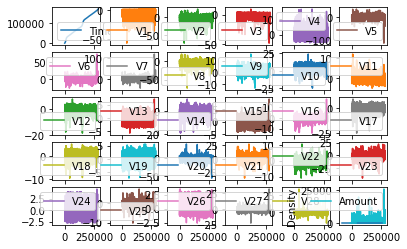

In [7]:
df_plot = df.drop(['Class'], axis=1)
df_plot.plot(subplots=True, layout=(5,6))
#df_plot.plot(subplots=True, layout=(5,6), figsize=(15,10)) adjust the figure size
for column in df_plot.columns:
    df_plot[column].plot(kind='kde')

TSNE for visualizing

In [9]:
X = df.drop(['Class'], axis = 1).values
y = df["Class"].values

In [10]:
def tsne_plot(X, y, title='TSNE plot of Fraud and Non Fraud'):
    tsne = TSNE(n_components=2, random_state=24, init='random', learning_rate=200)
    X_t = tsne.fit_transform(X)

    plt.figure(figsize=(12,8))
    plt.scatter(X_t[np.where(y==0), 0], X_t[np.where(y==0), 1], color='darkorange', alpha = 0.7, label = "Non Fraud")
    plt.scatter(X_t[np.where(y==1), 0], X_t[np.where(y==1), 1], color='mediumblue', alpha = 0.7, label = "Fraud")

    plt.legend(loc='best')
    plt.title(title, fontsize=16)
    plt.show()

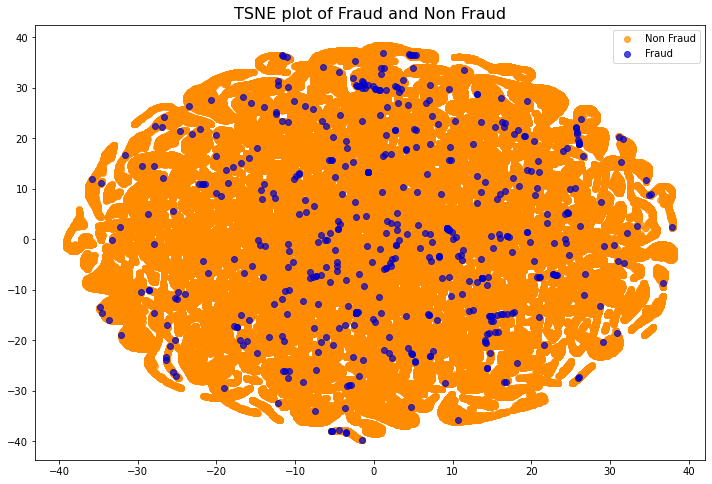

In [11]:
tsne_plot(X,y)

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

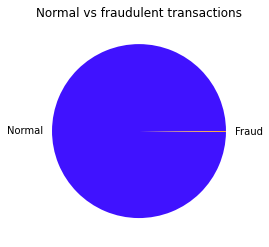

In [13]:
orange, purple = '#ffa022', '#4012ff'
fig, ax = plt.subplots()
ax.pie(df.groupby(['Class']).Class.count(), labels= ['Normal', 'Fraud'], colors=[purple, orange])
plt.title('Normal vs fraudulent transactions')
plt.show()

Text(0, 0.5, 'Count')

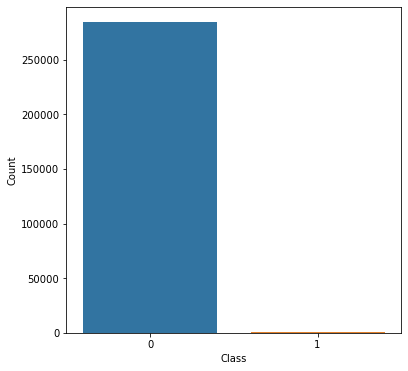

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x=df["Class"],data=df)
plt.xlabel("Class")
plt.ylabel("Count")

From the above output, this dataset is deeply imbalanced. In addition, with so many features, there are some hidden patterns that existing detection didn't capture. Therefore, it is necessary to relabel the dataset.

In [8]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [9]:
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)

In [17]:
x=df.drop(["Class"],axis=1)
y=df['Class']

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The above output is interest as it demonstrates that according to the existing data, there are so many transactions that should have been flagged

After relabelling, using festure engineering to select relevant features is paramount

### Correlation

<AxesSubplot:>

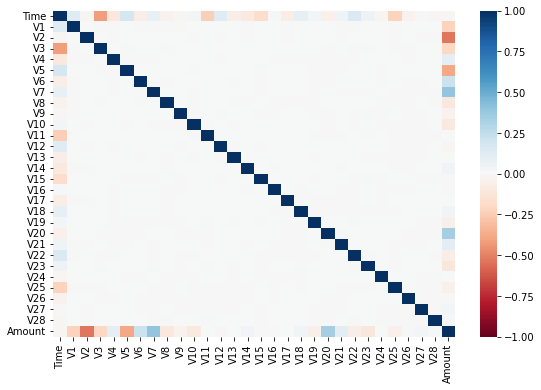

In [11]:
x_corr = df.drop(['Class'], axis=1)
corr = df_corr.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1)

In [13]:
correlation_matrix=df.corr()
corr_feature_lst=abs(correlation_matrix.iloc[:,-1]).sort_values(ascending=False)

In [15]:
corr_feature_lst

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.017082
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [16]:
selected_10_features_from_corr=list(corr_feature_lst.index)[1:11]

In [17]:
selected_10_features_from_corr

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']

The above gives ranks on the importance of different features. However, correlation only indicates linear relationships.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
ndf=df.copy()

In [20]:
x=ndf.drop("Class",axis=1)
y=ndf["Class"]

In [21]:
from pandas.core.common import random_state
RandomForestClassifier,
rf=RandomForestClassifier(random_state=42)
rf.fit(x,y)

RandomForestClassifier(random_state=42)

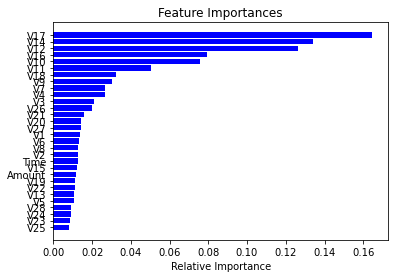

In [22]:
features = x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
importances

array([0.01249799, 0.01364177, 0.01264662, 0.0211399 , 0.02658221,
       0.01058   , 0.01347176, 0.02678862, 0.01267019, 0.03031583,
       0.07586425, 0.05050917, 0.12647407, 0.01070423, 0.1342035 ,
       0.01227177, 0.07924507, 0.16459337, 0.03250608, 0.01106769,
       0.01448506, 0.01607105, 0.01097524, 0.0083937 , 0.00896313,
       0.0078794 , 0.01985935, 0.01446232, 0.00936567, 0.011771  ])

In [24]:
#select top 10 performed features as the features below tend to perform worse
selected_features_rf=x.columns[importances.argsort()[::-1][:10]].tolist()

In [25]:
selected_features_rf

['V17', 'V14', 'V12', 'V16', 'V10', 'V11', 'V18', 'V9', 'V7', 'V4']

Generally, the features revealed from Random Forest are more convincing as it takes linear and nonlinear relationship into consideration

### Train Model

start with regular approach

In [26]:
selected_df=ndf[selected_features_rf]

In [27]:
ndf.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [28]:
!pip install imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
import xgboost as xg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from numpy import mean
from sklearn.neural_network import MLPClassifier

In [ ]:
x=ndf.drop(['Class'],axis=1)
y=ndf['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
y_test.value_counts()

1    83928
0     1515
Name: cluster_labels, dtype: int64

In [ ]:
models=[("XGboosting",xg.XGBClassifier(objective ='reg:squarederror',n_estimators = 20, seed = 123)),
       ("Decision Tree",DecisionTreeClassifier(max_depth=8,min_samples_leaf=0.13,random_state=3)),
       ("RandomForest",RandomForestClassifier(random_state=42)),
       ("Logistic Regression",LogisticRegression()),
       ("Neural Network", MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,activation='relu',solver='adam',random_state=1))]

In [ ]:
for name, model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5)
    
    # Print average score and standard deviation
    print("Average cross-validation score for", name, ":", mean(scores))
    print("Standard deviation for", name, ":", scores.std())
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on test data
    y_pred = model.predict(x_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Compute accuracy and print
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score for", name, ":", accuracy)
    # Print results
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print("Confusion matrix for", name)
    print(cm)

Average cross-validation score for XGboosting : 1.0
Standard deviation for XGboosting : 0.0
Accuracy score for XGboosting : 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix for XGboosting
[[ 1515     0]
 [    0 83928]]
Average cross-validation score for Decision Tree : 0.9813807909635566
Standard deviation for Decision Tree : 1.2211432324763546e-05
Accuracy score for Decision Tree : 0.9822688810083916
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1515
           1       0.98      1.00      0.99     83928

    accuracy                           0.98     85443
   macro avg       0.49      0

c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average cross-validation score for RandomForest : 0.9999949840744364
Standard deviation for RandomForest : 1.0031851127312309e-05
Accuracy score for RandomForest : 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix for RandomForest
[[ 1515     0]
 [    0 83928]]


c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average cross-validation score for Logistic Regression : 0.9976876486284965
Standard deviation for Logistic Regression : 0.0005852471051945656


c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for Logistic Regression : 0.9988530365272755
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       0.98      0.98      0.98     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix for Logistic Regression
[[ 1466    49]
 [   49 83879]]
Average cross-validation score for Neural Network : 0.9996187876443502
Standard deviation for Neural Network : 0.00013589393136596793
Accuracy score for Neural Network : 0.9998244443664197
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.0

oversampling approach

In [ ]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Define models
models = [("XGboosting", xg.XGBClassifier(objective='reg:squarederror', n_estimators=20, seed=123)),
          ("Decision Tree", DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.13, random_state=3)),
          ("RandomForest", RandomForestClassifier(random_state=42)),
          ("Logistic Regression", LogisticRegression())]

In [ ]:
for name, model in models:
    # Apply SMOTE to training data
    smote = SMOTE()
    x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)
    
    # Perform cross-validation
    scores = cross_val_score(model, x_train_oversampled, y_train_oversampled, cv=5)
    
    # Print average score and standard deviation
    print("Average cross-validation score for", name, ":", mean(scores))
    print("Standard deviation for", name, ":", scores.std())
    
    # Train the model and make predictions on test data
    model.fit(x_train_oversampled, y_train_oversampled)
    y_pred = model.predict(x_test)
    
    # Compute accuracy and print
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score for", name, ":", accuracy)
    
    # Print results
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print("Confusion matrix for", name)
    print(confusion_matrix(y_test, y_pred))


Average cross-validation score for XGboosting : 1.0
Standard deviation for XGboosting : 0.0
Accuracy score for XGboosting : 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix for XGboosting
[[ 1515     0]
 [    0 83928]]
Average cross-validation score for Decision Tree : 1.0
Standard deviation for Decision Tree : 0.0
Accuracy score for Decision Tree : 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00  

c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average cross-validation score for Logistic Regression : 0.9944518874250068
Standard deviation for Logistic Regression : 0.0011185013323649607
Accuracy score for Logistic Regression : 0.9896188102009527
Classification report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1515
           1       1.00      0.99      0.99     83928

    accuracy                           0.99     85443
   macro avg       0.82      0.99      0.88     85443
weighted avg       0.99      0.99      0.99     85443

Confusion matrix for Logistic Regression
[[ 1512     3]
 [  884 83044]]


c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


weight approach

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Define models
models = [("XGboosting", XGBClassifier(objective='reg:squarederror', n_estimators=20, seed=123)),
          ("Decision Tree", DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.13, random_state=3)),
          ("RandomForest", RandomForestClassifier(random_state=42)),
          ("Logistic Regression", LogisticRegression())]

for name, model in models:
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
    
    # Set class weights in model and train on training data
    model.set_params(class_weight=weights_dict)
    model.fit(x_train, y_train)
    
    # Make predictions on test data
    y_pred = model.predict(x_test)
    
    # Compute accuracy and print
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score for", name, ":", accuracy)
    
    # Print results
    print('Classification report:\n', classification_report(y_test, y_pred))
    print("Confusion matrix for", name)
    print(confusion_matrix(y_test, y_pred))


[18:55:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Accuracy score for XGboosting : 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00     83928

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix for XGboosting
[[ 1515     0]
 [    0 83928]]
Accuracy score for Decision Tree : 0.8904883957726203
Classification report:
               precision    recall  f1-score   support

           0       0.14      1.00      0.24      1515
           1       1.00      0.89      0.94     83928

    accuracy                           0.89     85443
   macro avg       0.57      0.94      0.59     8544

c:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
